In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# sample size
N = 115

In [3]:
def absolute_frequency_hist(edges, frequencies, width, medians, var):
    """Plot the absolute frequency histogram"""
    plt.title(f'Absolute frequency histogram for "{var}"')
    plt.ylabel('Frequency')
    plt.grid(True)
    
    plt.xticks(edges)
    plt.yticks(frequencies / width)
    plt.bar(medians, frequencies / width, color='pink', width=width)
    plt.show()

    

In [4]:
# read data and separate experimental values in different ndarrays
# TODO: make reading using numpy, if we wouldn't need pandas at all
data = pd.read_csv('input_data/sample.csv')
sample_v, sample_E = np.array(data['v']), np.array(data['E'])

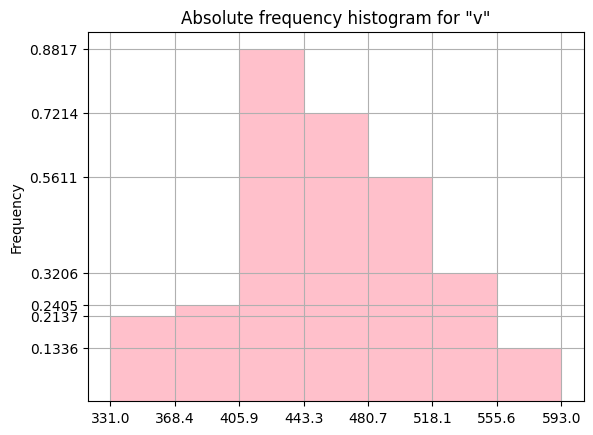

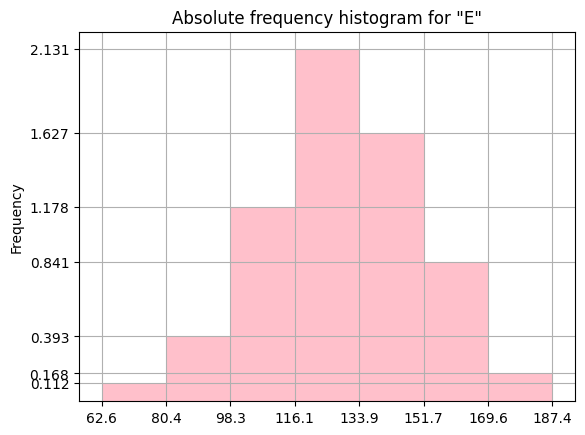

In [5]:
# SERIES

# ranked series (increasing order)
ranked_v, ranked_E = np.sort(sample_v), np.sort(sample_E)

# variation series
variation_v = np.array(np.unique(ranked_v, return_counts=True))
variation_E = np.array(np.unique(ranked_E, return_counts=True))

# interval series

# calculate number of bins using Sturges' rule
bins_number = int(1 + 3.322 * np.log10(N))
interval_width_v = (ranked_v[-1] - ranked_v[0]) / bins_number
interval_width_E = (ranked_E[-1] - ranked_E[0]) / bins_number

# calculate frequencies and interval values
freq_v, edges_v = np.histogram(ranked_v, bins=bins_number)
freq_E, edges_E = np.histogram(ranked_E, bins=bins_number)

# intervals' medians
intervals_medians_v = (edges_v[1:] + edges_v[:-1]) / 2
intervals_medians_E = (edges_E[1:] + edges_E[:-1]) / 2

absolute_frequency_hist(edges_v, freq_v, interval_width_v, 
                        intervals_medians_v, var='v')
absolute_frequency_hist(edges_E, freq_E, interval_width_E, 
                        intervals_medians_E, var='E')